## Importing Required Packages

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import csv
import json

import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from collections import defaultdict
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\bhush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


## Reading the Data and checking null values

In [2]:
data = pd.read_csv('Airbnb1.csv', header = 0)
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [3]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
# Sampling for better performance as the dataset has 74,111 rows, taking 10% of it i.e 7,411 rows
# Which is well above the required criteria of 1,000 rows

In [4]:
df = pd.DataFrame(data)
data = df.sample(frac =.1) 
data.shape
#using 10% of data which has 7411 rows and 187 columns

(7411, 29)

In [5]:
data=data.drop(columns=['id','longitude','latitude','name','neighbourhood','thumbnail_url','zipcode','description','first_review','host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'last_review', 'review_scores_rating', 'number_of_reviews'])
print('done')

done


## Filling in Missing values with Median

In [6]:
a = ['bathrooms', 'beds', 'bedrooms']
for i in a:
  data[i].fillna(data[i].median(), inplace=True)

data.isnull().sum()

log_price              0
property_type          0
room_type              0
amenities              0
accommodates           0
bathrooms              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
city                   0
instant_bookable       0
bedrooms               0
beds                   0
dtype: int64

# One hot Vector

In [7]:
df = pd.get_dummies(data['property_type'])
data = pd.concat([data, df], axis = 1)
data.drop('property_type', axis = 1, inplace=True)
df.head()

,Apartment,Bed & Breakfast,Boat,Boutique hotel,Bungalow,Cabin,Camper/RV,Castle,Condominium,Dorm,...,Other,Parking Space,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Treehouse,Vacation home,Villa
26598,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11337,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6004,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18408,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
24793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = pd.get_dummies(data['room_type'])
data = pd.concat([data, df], axis = 1)
data.drop('room_type', axis = 1, inplace=True)
df.head()

,Entire home/apt,Private room,Shared room
26598,0,1,0
11337,1,0,0
6004,0,1,0
18408,1,0,0
24793,1,0,0


In [9]:
df = pd.get_dummies(data['city'])
data = pd.concat([data, df], axis = 1)
data.drop('city', axis = 1, inplace=True)
df.head()

,Boston,Chicago,DC,LA,NYC,SF
26598,0,0,0,0,1,0
11337,0,0,0,0,1,0
6004,0,0,0,1,0,0
18408,0,0,0,0,1,0
24793,0,0,0,0,1,0


In [10]:
data.isnull().sum()

log_price              0
amenities              0
accommodates           0
bathrooms              0
bed_type               0
cancellation_policy    0
cleaning_fee           0
instant_bookable       0
bedrooms               0
beds                   0
Apartment              0
Bed & Breakfast        0
Boat                   0
Boutique hotel         0
Bungalow               0
Cabin                  0
Camper/RV              0
Castle                 0
Condominium            0
Dorm                   0
Earth House            0
Guest suite            0
Guesthouse             0
Hostel                 0
House                  0
Hut                    0
In-law                 0
Loft                   0
Other                  0
Parking Space          0
Serviced apartment     0
Tent                   0
Timeshare              0
Tipi                   0
Townhouse              0
Treehouse              0
Vacation home          0
Villa                  0
Entire home/apt        0
Private room           0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7411 entries, 26598 to 5726
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   log_price            7411 non-null   float64
 1   amenities            7411 non-null   object 
 2   accommodates         7411 non-null   int64  
 3   bathrooms            7411 non-null   float64
 4   bed_type             7411 non-null   object 
 5   cancellation_policy  7411 non-null   object 
 6   cleaning_fee         7411 non-null   bool   
 7   instant_bookable     7411 non-null   object 
 8   bedrooms             7411 non-null   float64
 9   beds                 7411 non-null   float64
 10  Apartment            7411 non-null   uint8  
 11  Bed & Breakfast      7411 non-null   uint8  
 12  Boat                 7411 non-null   uint8  
 13  Boutique hotel       7411 non-null   uint8  
 14  Bungalow             7411 non-null   uint8  
 15  Cabin                7411 non-null

## Label Encoding

In [12]:
data['cleaning_fee'] = data['cleaning_fee'].astype(int)

In [13]:
def encoding(attribute):
    unique = data[attribute].unique()
    encoding = {}
    j = 0
    for i in unique:
        encoding[i] = j
        j +=1
    data[attribute][:] = [encoding[item] for item in data[attribute][:]]

In [14]:
encoding('instant_bookable')

In [15]:
encoding('bed_type')

In [16]:
encoding('cancellation_policy')

In [17]:
data.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,...,Villa,Entire home/apt,Private room,Shared room,Boston,Chicago,DC,LA,NYC,SF
26598,4.007333,"{""Family/kid friendly""}",2,1.0,0,0,1,0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
11337,4.317488,"{Kitchen,""Pets live on this property"",Cat(s),E...",2,1.0,0,0,1,0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0
6004,4.234107,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,0,1,0,0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
18408,4.442651,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,0,0,0,0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0
24793,6.204558,"{""Wireless Internet"",""Air conditioning"",Kitche...",6,1.0,0,0,1,1,2.0,3.0,...,0,1,0,0,0,0,0,0,1,0


## Sanitizing Amenities Column of Arrays

In [18]:
import pandas as pd

data_frame = data
l = [[word.strip('[" ]') for word in row[1:-1].split(',')] for row in list(data_frame['amenities'])]
cols = set(word for row in l for word in row)
cols.remove('')

data_frame = pd.concat([data_frame, pd.DataFrame(columns=list(cols))])
writer = pd.ExcelWriter('pandasEx.xlsx', engine='xlsxwriter')

for index, row in data_frame.iterrows():
    # Get id and amenities column values
    space_id = str(row[0])
    amenities = str(row[4])
    # Sanitize data
    amenities = amenities.replace("{", "").replace("}", "").replace("\"", "").split(",")
    i = 1
    for amenity in amenities:
        if i == 1 :
            print(amenity)
            i = 2
        amenity = str(amenity)
        data_frame.at[index, amenity] = 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
4.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [19]:
#checking ameneity spliting
data_frame.head()

,log_price,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,...,Private living room,Elevator in building,Dryer,Indoor fireplace,Bathtub,0.0,1.0,2.0,3.0,4.0
26598,4.007333,"{""Family/kid friendly""}",2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
11337,4.317488,"{Kitchen,""Pets live on this property"",Cat(s),E...",2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
6004,4.234107,"{TV,Internet,""Wireless Internet"",""Air conditio...",2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
18408,4.442651,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
24793,6.204558,"{""Wireless Internet"",""Air conditioning"",Kitche...",6.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [20]:
data_frame.isnull().sum()

log_price          0
amenities          0
accommodates       0
bathrooms          0
bed_type           0
                ... 
0.0              203
1.0             7334
2.0             7382
3.0             7353
4.0             7372
Length: 172, dtype: int64

In [21]:
data_frame.fillna(0, inplace=True)

In [22]:
data_frame.isnull().sum()

log_price       0
amenities       0
accommodates    0
bathrooms       0
bed_type        0
               ..
0.0             0
1.0             0
2.0             0
3.0             0
4.0             0
Length: 172, dtype: int64

In [23]:
data = data_frame
data=data.drop(columns=['amenities','0.0','1.0','2.0','3.0','4.0'])

In [24]:
data.head()

,log_price,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,instant_bookable,bedrooms,beds,Apartment,...,First aid kit,smooth pathway to front door,Baby bath,Wheelchair accessible,Essentials,Private living room,Elevator in building,Dryer,Indoor fireplace,Bathtub
26598,4.007333,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
11337,4.317488,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6004,4.234107,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
18408,4.442651,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24793,6.204558,6.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Data Exploration

Text(0, 0.5, 'Price')

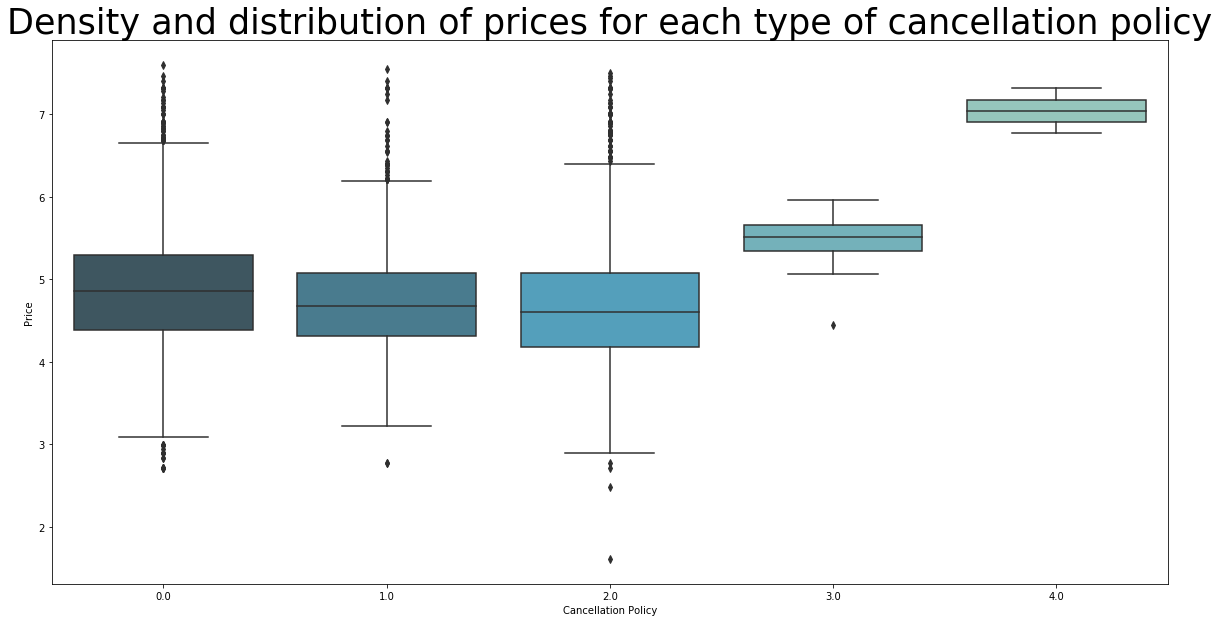

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='cancellation_policy', y='log_price', palette='GnBu_d')
plt.title('Density and distribution of prices for each type of cancellation policy', fontsize=35)
plt.xlabel('Cancellation Policy')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

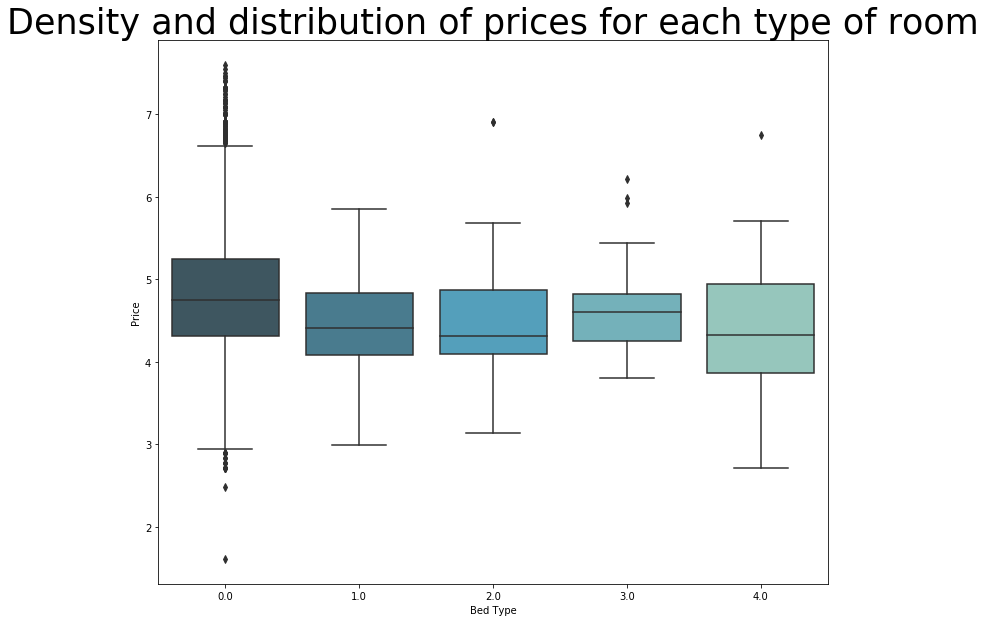

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data, x='bed_type', y='log_price', palette='GnBu_d')
plt.title('Density and distribution of prices for each type of room', fontsize=35)
plt.xlabel('Bed Type')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

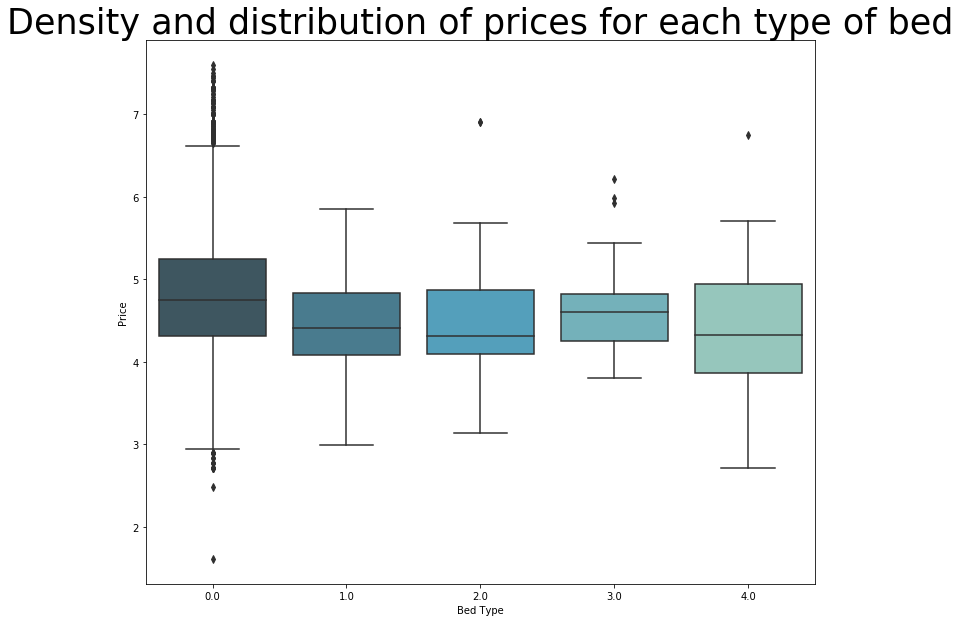

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data, x='bed_type', y='log_price', palette='GnBu_d')
plt.title('Density and distribution of prices for each type of bed', fontsize=35)
plt.xlabel('Bed Type')
plt.ylabel("Price")

Text(0.5, 1.0, 'Numbers in bed Type')

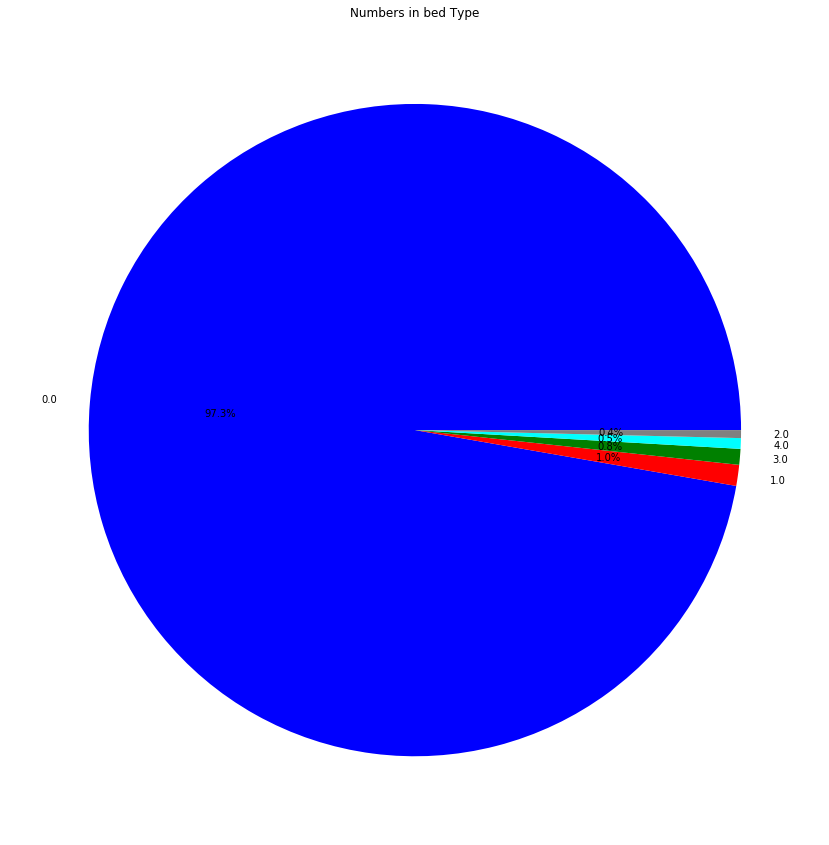

In [28]:
plt.figure(figsize=(15,15))
numbers = data['bed_type'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in bed Type')

Text(0.5, 1.0, 'Distribution of price')

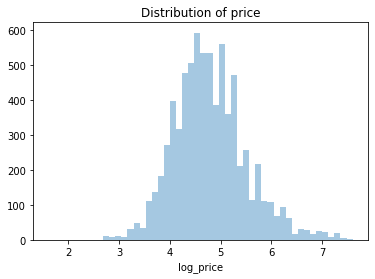

In [29]:
sns.distplot(data['log_price'], kde=False)
plt.title('Distribution of price')

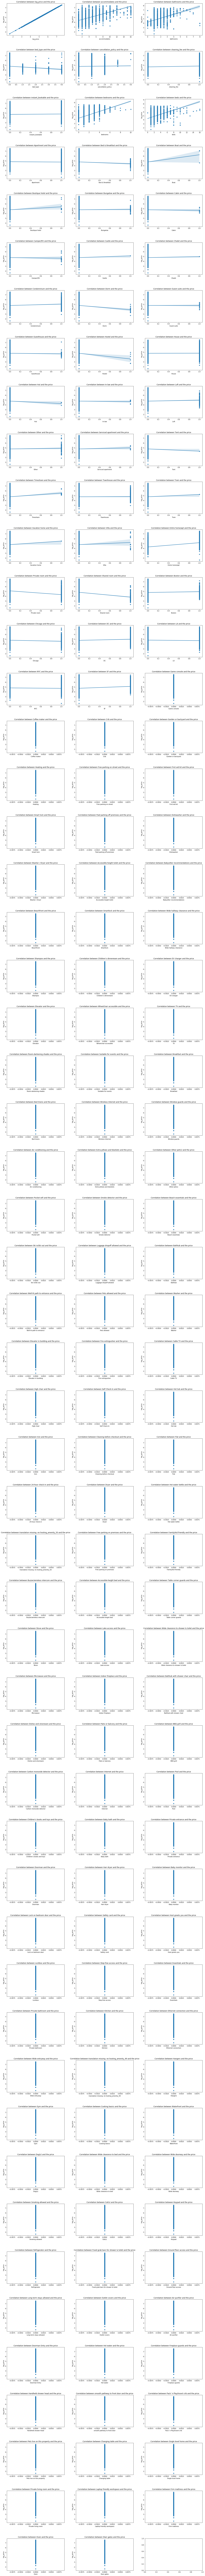

In [91]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
nrows = int(len(newdf.columns) / 3) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(24, 6*nrows))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), newdf.columns):
  
  sns.regplot(x=name, y='log_price', data=newdf, ax=ax)
  ax.set_title(f"Correlation between {name} and the price")

plt.show()

## Setting Target Variable and Train-Test Split

In [30]:
#all columns except the final one belongs to X and the target belong to y
y = data['log_price'].values
X = data.drop(['log_price'], axis = 1).values

In [31]:
#Splitting the dataset
from sklearn.model_selection import train_test_split,cross_val_score 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Scaling

In [32]:
sc=StandardScaler()

In [33]:
# scaler=sc.fit(xTrain)
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [34]:
# Model Development
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

# Princple Component Analysis

In [ ]:
# Performing PCA in the  beginning as there are a total 166 Columns in the current dataset

In [35]:
from sklearn.decomposition import PCA

pca=PCA(n_components = 30)
pca.fit(X_train)
xTrain=pca.transform(X_train)
xTest = pca.transform(X_test)

pca.explained_variance_ratio_.sum()

0.9209395098781781

# Bagging with SVR Bootstrap

In [36]:

tuned_parameters=[{'n_estimators':[50,62,73,84]}]
scores=['precision','recall']

print("# Tuning hyper-parameters")
print()
model_base=BaggingRegressor(base_estimator=SVR(kernel='poly',degree=2,C=1))
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 73}

Grid scores found on development set:

0.366 (+/-0.095) for {'n_estimators': 50}
0.363 (+/-0.092) for {'n_estimators': 62}
0.367 (+/-0.089) for {'n_estimators': 73}
0.363 (+/-0.100) for {'n_estimators': 84}

train score is: 0.5405081207430762
r square score is: 0.4136297242973015



# SVR Pasting

In [37]:

scores=['precision','recall']
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
print("# Tuning hyper-parameters")
print()
model_base=BaggingRegressor(base_estimator=SVR(kernel='rbf',degree=3,C=1),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 73}

Grid scores found on development set:

0.553 (+/-0.031) for {'n_estimators': 50}
0.553 (+/-0.031) for {'n_estimators': 62}
0.553 (+/-0.031) for {'n_estimators': 73}
0.553 (+/-0.031) for {'n_estimators': 84}

train score is: 0.6309820706729898
r square score is: 0.5419644316166228



# Adaboost regerssor with SVR

In [38]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= SVR(kernel='rbf',degree=3,C=1),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'n_estimators': 50}

Grid scores found on development set:

0.488 (+/-0.023) for {'n_estimators': 50}
0.487 (+/-0.023) for {'n_estimators': 62}
0.486 (+/-0.022) for {'n_estimators': 73}
0.486 (+/-0.022) for {'n_estimators': 84}

train score is: 0.6039435052326305
r square score is: 0.49733989743616724



In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Bagging with KNN Bootstrap

In [40]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2))
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for KNN: {'n_estimators': 84}

Grid scores found on development set:

0.461 (+/-0.029) for {'n_estimators': 50}
0.458 (+/-0.033) for {'n_estimators': 62}
0.460 (+/-0.030) for {'n_estimators': 73}
0.463 (+/-0.031) for {'n_estimators': 84}

train score is: 0.7353564557566986
r square score is: 0.4867935805359216



# KNN pasting

In [41]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for KNN: {'n_estimators': 73}

Grid scores found on development set:

0.338 (+/-0.019) for {'n_estimators': 50}
0.338 (+/-0.019) for {'n_estimators': 62}
0.338 (+/-0.019) for {'n_estimators': 73}
0.338 (+/-0.019) for {'n_estimators': 84}

train score is: 0.6552815377965959
r square score is: 0.37341317750187886



# Adaboost with KNN

In [42]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= KNeighborsRegressor(n_neighbors=2),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for KNN:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for KNN: {'n_estimators': 62}

Grid scores found on development set:

0.423 (+/-0.042) for {'n_estimators': 50}
0.425 (+/-0.046) for {'n_estimators': 62}
0.424 (+/-0.045) for {'n_estimators': 73}
0.424 (+/-0.045) for {'n_estimators': 84}

train score is: 0.6844716036093251
r square score is: 0.4326865825337026



# Bagging with Decision Tree Bootstrap

In [43]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),bootstrap=True)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 62}

Grid scores found on development set:

0.514 (+/-0.041) for {'n_estimators': 50}
0.518 (+/-0.046) for {'n_estimators': 62}
0.516 (+/-0.047) for {'n_estimators': 73}
0.516 (+/-0.047) for {'n_estimators': 84}

train score is: 0.7719308220386559
r square score is: 0.523076587607292



# Decision Tree Pasting

In [44]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
model_base=BaggingRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),bootstrap=False)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 73}

Grid scores found on development set:

0.363 (+/-0.063) for {'n_estimators': 50}
0.364 (+/-0.063) for {'n_estimators': 62}
0.365 (+/-0.066) for {'n_estimators': 73}
0.362 (+/-0.063) for {'n_estimators': 84}

train score is: 0.7737441915405161
r square score is: 0.38286288001763724



# Adaboost with Decision tree

In [45]:

print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
# tuned_para[{'n_neighbors':[1,2,3,4,5]}]
model_base=AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=16),learning_rate=0.5,random_state=0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Decision Tree: {'n_estimators': 84}

Grid scores found on development set:

0.441 (+/-0.031) for {'n_estimators': 50}
0.442 (+/-0.034) for {'n_estimators': 62}
0.443 (+/-0.040) for {'n_estimators': 73}
0.443 (+/-0.040) for {'n_estimators': 84}

train score is: 0.7687576442358587
r square score is: 0.4249604178129306



# Gradient Boosting Regressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
print("# Tuning hyper-parameters")
print()
tuned_parameters=[{'n_estimators':[50,62,73,84]}]
model_base=GradientBoostingRegressor(max_depth=3,learning_rate=1.0)
model = GridSearchCV(model_base, tuned_parameters, cv=5,n_jobs=-1,return_train_score=True)
model.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(X_test)
print('train score is:',model.score(X_train,y_train))
print('r square score is:',model.score(X_test,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters: {'n_estimators': 50}

Grid scores found on development set:

0.511 (+/-0.063) for {'n_estimators': 50}
0.503 (+/-0.061) for {'n_estimators': 62}
0.505 (+/-0.052) for {'n_estimators': 73}
0.500 (+/-0.064) for {'n_estimators': 84}

train score is: 0.6421796513597771
r square score is: 0.5107115863261913



# Neural Networks

In [ ]:
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import SGD
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

In [ ]:
# create model
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))


In [ ]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

In [ ]:
model.evaluate(X_test, y_test)

# Ran the Neural code on Virtual Environment using CMD because Tensorflow was not compatible, have attached the ss of output

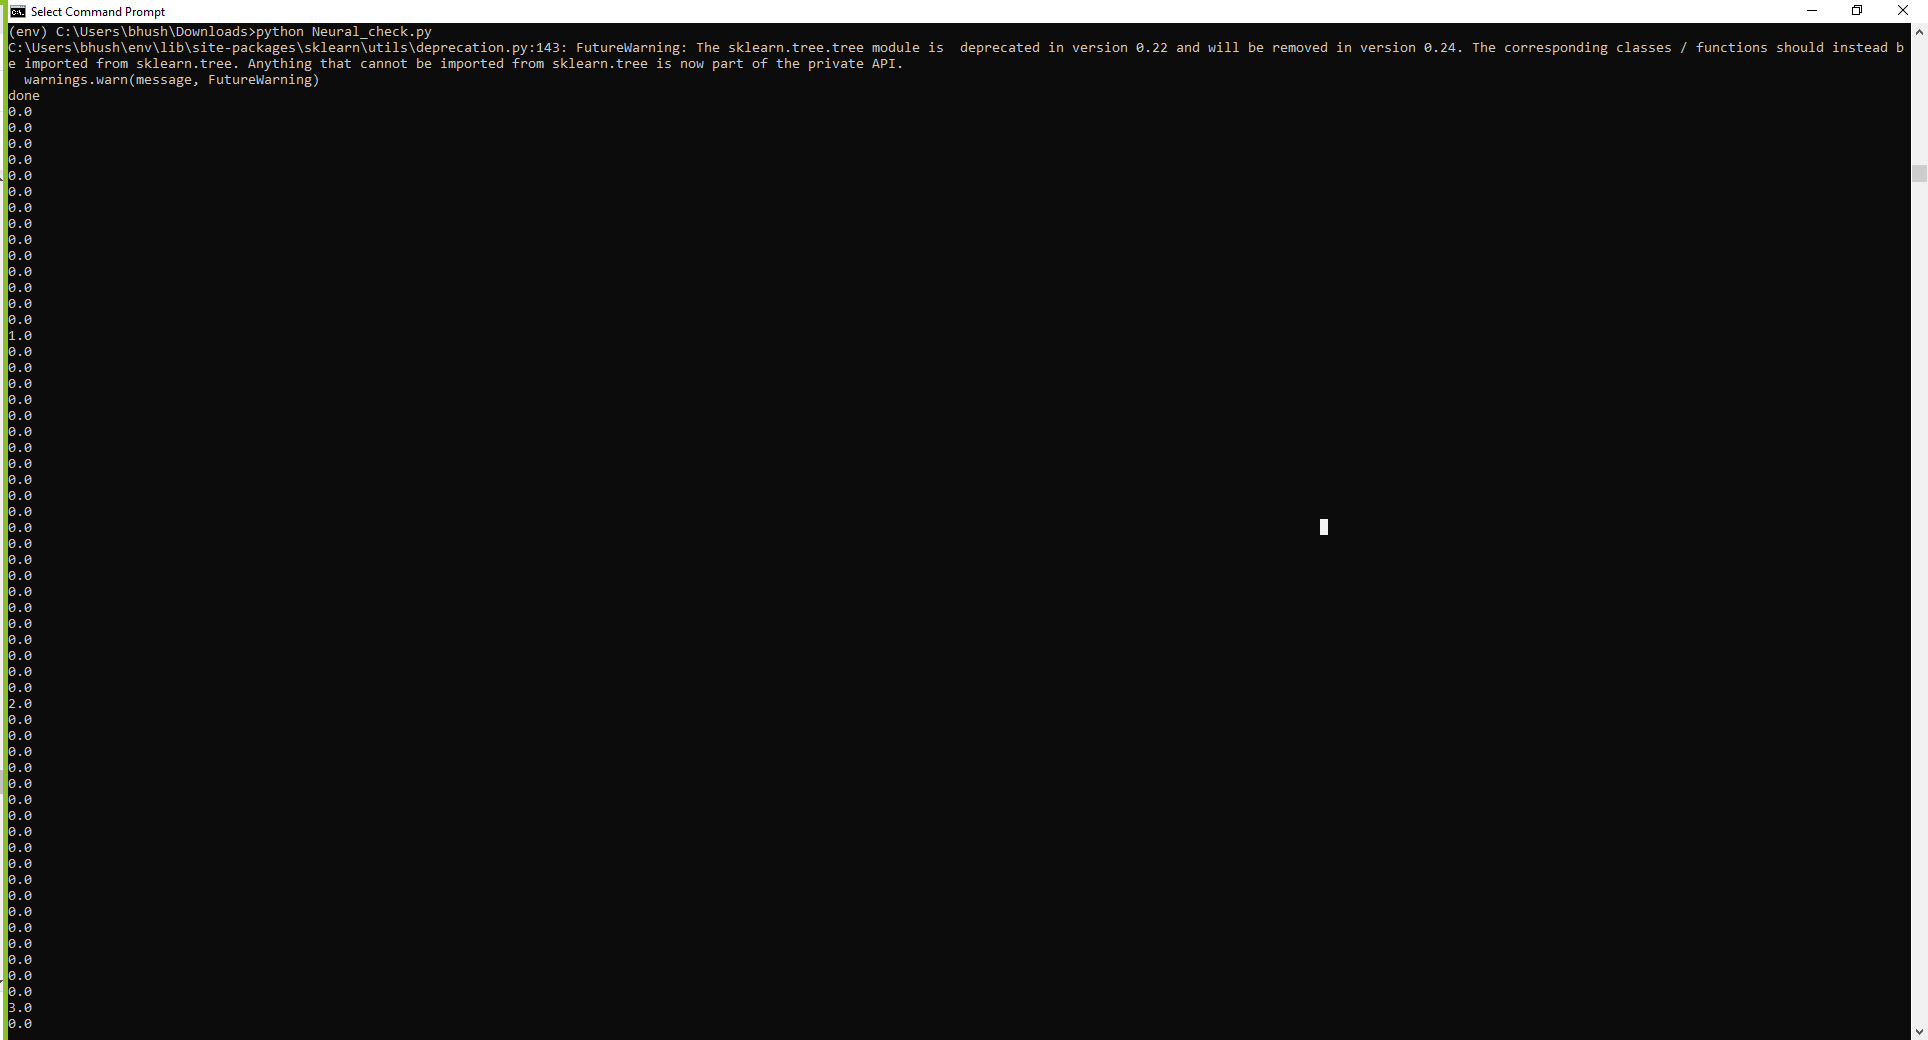

In [3]:
from IPython.display import Image
Image(filename='NNRUN.png')

In [ ]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

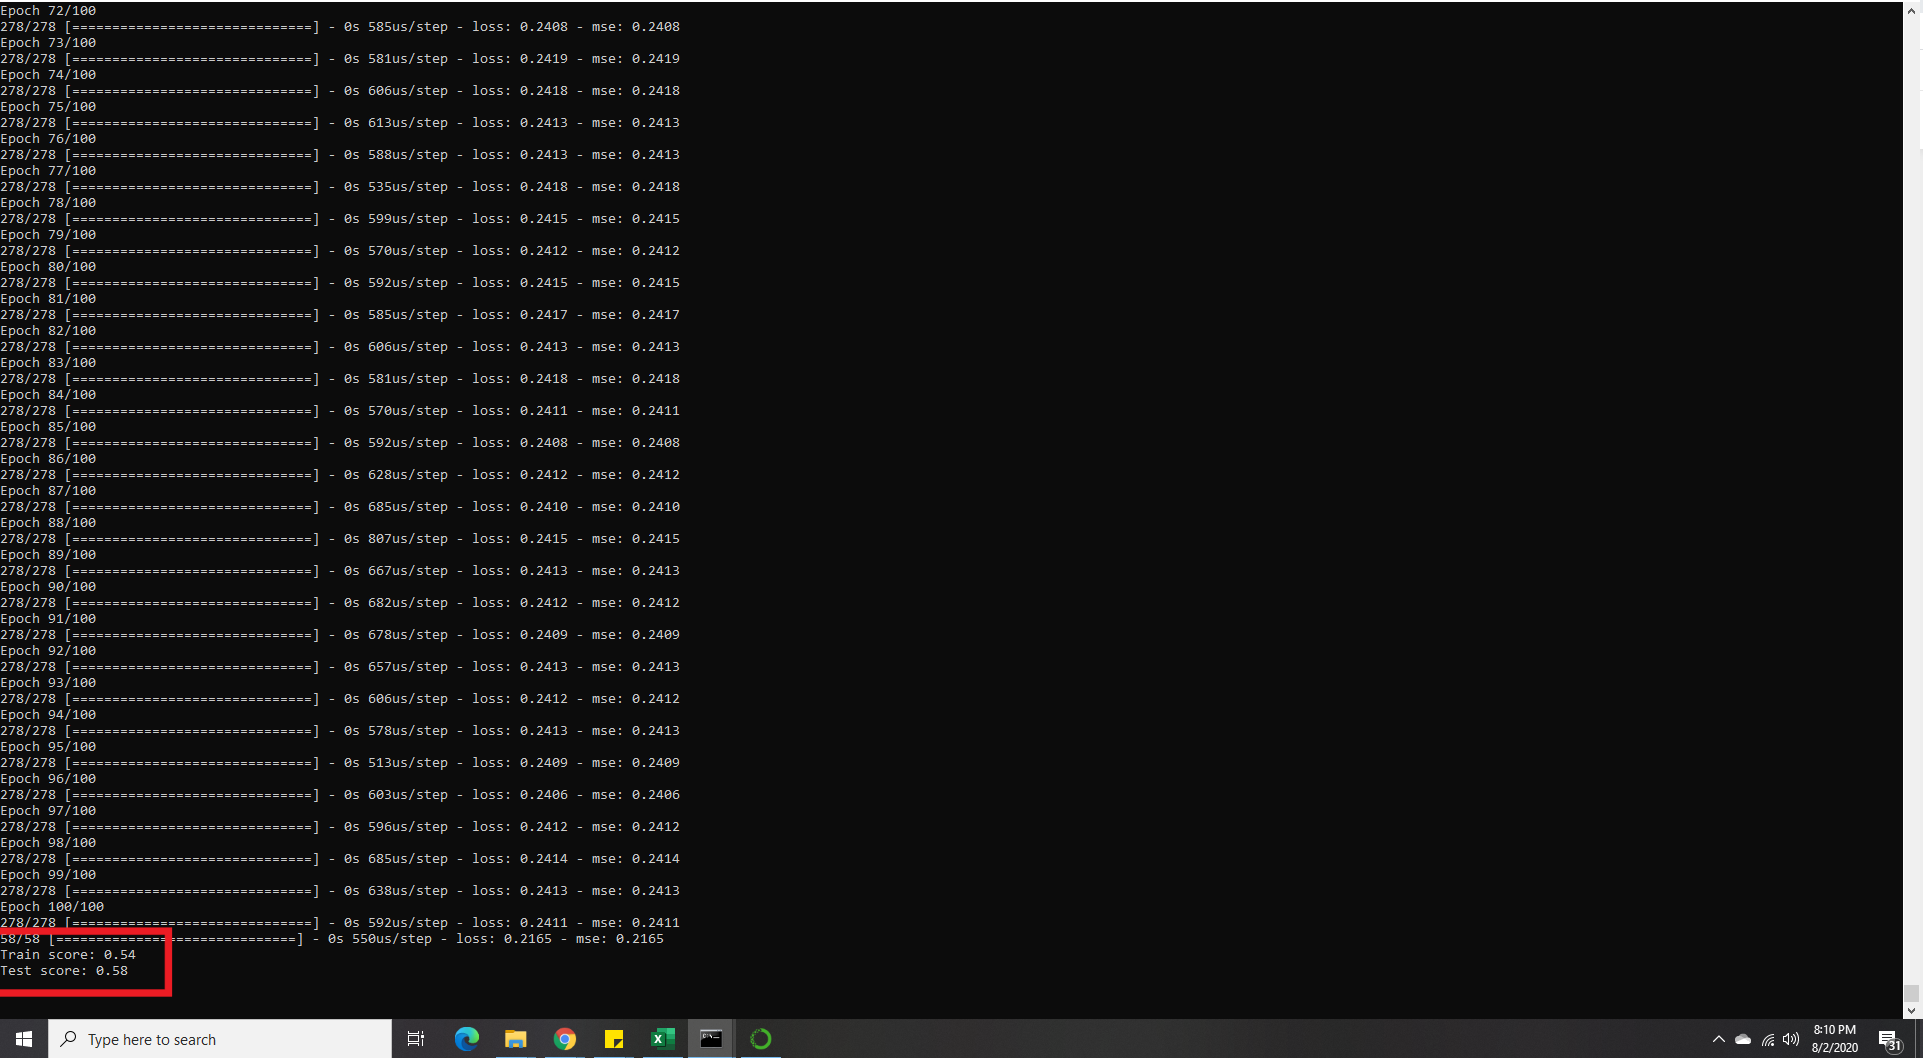

In [7]:
from IPython.display import Image
Image(filename='NNscore.png')

# PCA of Basic Models

# KNN Regressor

In [49]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
tuned_parameters = [{'n_neighbors':[1,2,3,4,5]}]


print("# Tuning hyper-parameters #")
print()

model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for knn regressor:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))


# Tuning hyper-parameters #

Best parameters set found on development set:

Best parameters for knn regressor: {'n_neighbors': 5}

Grid scores found on development set:

0.153 (+/-0.077) for {'n_neighbors': 1}
0.358 (+/-0.021) for {'n_neighbors': 2}
0.424 (+/-0.022) for {'n_neighbors': 3}
0.457 (+/-0.018) for {'n_neighbors': 4}
0.478 (+/-0.023) for {'n_neighbors': 5}

train score is: 0.623389928975296
r square score is: 0.4675384069100743


# Linear SVR

In [50]:

from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import LinearSVR
tuned_parameters = [{'C': [0.1, 1, 5, 10, 100]}]

print("# Tuning hyper-parameters")
print()

    
model = GridSearchCV(LinearSVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Linear SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for Linear SVM: {'C': 0.1}

Grid scores found on development set:

0.096 (+/-1.581) for {'C': 0.1}
-1.673 (+/-8.684) for {'C': 1}
-2.148 (+/-10.533) for {'C': 5}
-3.965 (+/-16.385) for {'C': 10}
-11.482 (+/-29.404) for {'C': 100}

train score is: 0.5163927134720433
r square score is: 0.5023496210635265



# SVR

In [51]:

from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 5, 10]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'degree': [2,3],'C': [1, 5, 10]},
                    {'kernel': ['linear'], 'C': [1, 5, 10]}]

print("# Tuning hyper-parameters")
print()

model = GridSearchCV(SVR(), tuned_parameters, cv=5, n_jobs=-1,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for SVM:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

Best parameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores found on development set:

0.521 (+/-0.039) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.488 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.531 (+/-0.040) for {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
0.511 (+/-0.040) for {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}
0.537 (+/-0.041) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.513 (+/-0.040) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.081 (+/-0.019) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
-0.012 (+/-0.011) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
-0.001 (+/-0.010) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
-0.014 (+/-0.011) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
0.169 (+/-0.052) for {'C': 5, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
-0.006 (+/-0.010) for {'C': 5, 'degree': 2, '

# Linear Regression

In [52]:

from sklearn.linear_model import LinearRegression
tuned_parameters = [{'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(LinearRegression(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Linear Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'normalize': False}

Grid scores found on development set:

-1.990 (+/-9.481) for {'copy_X': True, 'fit_intercept': True, 'normalize': True}
-1.990 (+/-9.481) for {'copy_X': True, 'fit_intercept': True, 'normalize': False}
-37581.775 (+/-119235.681) for {'copy_X': True, 'fit_intercept': False, 'normalize': True}
-37581.775 (+/-119235.681) for {'copy_X': True, 'fit_intercept': False, 'normalize': False}
-1.990 (+/-9.481) for {'copy_X': False, 'fit_intercept': True, 'normalize': True}
-1.990 (+/-9.481) for {'copy_X': False, 'fit_intercept': True, 'normalize': False}
-37581.775 (+/-119235.681) for {'copy_X': False, 'fit_intercept': False, 'normalize': True}
-37581.775 (+/-119235.681) for {'copy_X': False, 'fit_intercept': False, 'normalize': False}

train score is: 0.5249830964316606
r square score is: 0.5134687882541416



# Ridge Regression

In [53]:

from  sklearn.linear_model import Ridge
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Ridge(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Ridge Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()


# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Ridge Regression: {'alpha': 100}

Grid scores found on development set:

-1.979 (+/-9.440) for {'alpha': 0.01}
-1.879 (+/-9.082) for {'alpha': 0.1}
-1.155 (+/-6.388) for {'alpha': 1}
0.265 (+/-0.914) for {'alpha': 10}
0.511 (+/-0.035) for {'alpha': 100}

train score is: 0.5249495615621818
r square score is: 0.5135189891284988



# Lasso Regression

In [54]:

from sklearn.linear_model import Lasso
tuned_parameters = [{'alpha': [0.01, 0.1, 1, 10, 100]}]


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(Lasso(), tuned_parameters, cv=5, return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Lasso Regression:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Lasso Regression: {'alpha': 0.01}

Grid scores found on development set:

0.514 (+/-0.042) for {'alpha': 0.01}
0.431 (+/-0.056) for {'alpha': 0.1}
-0.001 (+/-0.001) for {'alpha': 1}
-0.001 (+/-0.001) for {'alpha': 10}
-0.001 (+/-0.001) for {'alpha': 100}

train score is: 0.5204511019332754
r square score is: 0.5108676685311597



# Decision Tree Regressor

In [55]:

from sklearn.tree import DecisionTreeRegressor

tuned_parameters = [{'max_depth':[10,11,12,13,14]}] 


print("# Tuning hyper parameters #")
print()

model = GridSearchCV(DecisionTreeRegressor(criterion='mse'), tuned_parameters, cv=5,return_train_score=True)
model.fit(xTrain, y_train)

print("Best parameters set found on development set:")
print()
print('Best parameters for Decision Tree Regressor:',model.best_params_)
print()
print("Grid scores found on development set:")
print()
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()


y_pred = model.predict(xTest)
print('train score is:',model.score(xTrain,y_train))
print('r square score is:',model.score(xTest,y_test))
print()

# Tuning hyper parameters #

Best parameters set found on development set:

Best parameters for Decision Tree Regressor: {'max_depth': 10}

Grid scores found on development set:

0.370 (+/-0.033) for {'max_depth': 10}
0.356 (+/-0.044) for {'max_depth': 11}
0.340 (+/-0.027) for {'max_depth': 12}
0.317 (+/-0.028) for {'max_depth': 13}
0.304 (+/-0.009) for {'max_depth': 14}

train score is: 0.699965223010595
r square score is: 0.4004375676331585



# Comparison and Conlusion

In [12]:
# After writing the train score and RSquare of everymodel we load it into the notebook
Chart = pd.read_csv('ScoreComparison.csv', header = 0)
Chart

,Model,Train score,R Square Score
0,SVR Bagging,0.54,0.41
1,SVR Pasting,0.63,0.54
2,SVR Adaboost,0.60,0.50
3,KNN Bagging,0.74,0.49
4,KNN Pasting,0.66,0.37
5,KNN Adaboost,0.68,0.43
6,DT Bagging,0.77,0.52
7,DT Pasting,0.77,0.38
8,DT Adaboost,0.77,0.42
9,Gradient Boosting,0.64,0.51


# _Neural Network is the Best Model to Predict Price of Airbnb Homes with a score of 0.58 among other models_

In [15]:
# Comapring Model performance with and Without PCA by writing in excel
Com = pd.read_csv('PCAcomparison.csv', header = 0)
Com

,Models,PCA,Without PCA
0,KNN,0.47,0.68
1,Linear SVR,0.50,0.53
2,SVR,0.53,0.56
3,Linear,0.51,-4.54
4,Ridge,0.51,0.55
5,Lasso,0.51,0.54
6,DT,0.40,0.40


## _Comparing the two tables we can observe that, PCA with Rsquare score evaluation did not performe well. PCA serves its purpose of reducing the whole dataset without losing much of the information of the data. Hence models without PCA is more accurate_